In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
trans = pd.read_csv('combined_csv.csv')

FileNotFoundError: ignored

In [0]:
trans.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_4368,2018-04-03 03:34:21.784487
1,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,FALSE,4111.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-19 06:15:59.537032
2,transaction_2,CARD_PAYMENT,AED,43.40,COMPLETED,FALSE,5814.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-18 18:53:41.323032
3,transaction_3,TRANSFER,AED,10043.01,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_2355,2019-03-22 14:20:01.513032
4,transaction_4,CARD_PAYMENT,AED,43.81,COMPLETED,FALSE,5651.0,Abu Dhabi,ARE,OUTBOUND,user_14318,2019-03-22 05:42:50.316652


In [0]:
trans.shape

(2181026, 12)

In [0]:
trans.keys()

Index(['transaction_id', 'transactions_type', 'transactions_currency',
       'amount_usd', 'transactions_state', 'ea_cardholderpresence',
       'ea_merchant_mcc', 'ea_merchant_city', 'ea_merchant_country',
       'direction', 'user_id', 'created_date'],
      dtype='object')

In [0]:
trans.dtypes

transaction_id            object
transactions_type         object
transactions_currency     object
amount_usd               float64
transactions_state        object
ea_cardholderpresence     object
ea_merchant_mcc          float64
ea_merchant_city          object
ea_merchant_country       object
direction                 object
user_id                   object
created_date              object
dtype: object

In [0]:
trans.describe()

,amount_usd,ea_merchant_mcc
count,2.181026e+06,1.257051e+06
mean,1.189225e+05,5.703386e+03
std,6.955454e+07,9.480411e+02
min,0.000000e+00,7.420000e+02
25%,2.030000e+00,5.411000e+03
50%,8.510000e+00,5.812000e+03
75%,2.807000e+01,5.921000e+03
max,7.464155e+10,9.406000e+03


In [0]:
trans.isna().sum()

transaction_id                0
transactions_type             0
transactions_currency         0
amount_usd                    0
transactions_state            0
ea_cardholderpresence    933206
ea_merchant_mcc          923975
ea_merchant_city         924080
ea_merchant_country      924239
direction                     0
user_id                       0
created_date                  0
dtype: int64

In [0]:
u,c = np.unique (trans.transactions_type , return_counts = True )
for z in zip(list(u) , list(c)):
  print ('{} : {}'.format(z[0],z[1]))

ATM : 74181
CARD_PAYMENT : 1173661
CARD_REFUND : 9209
CASHBACK : 65063
EXCHANGE : 124800
FEE : 18786
REFUND : 1193
TAX : 2267
TOPUP : 309740
TRANSFER : 402126


In [0]:
u,c = np.unique (trans.transactions_currency , return_counts = True )
for z in zip(list(u) , list(c)):
  print ('{} : {}'.format(z[0],z[1]))

AED : 2590
AUD : 13161
BCH : 284
BGN : 219
BTC : 3014
CAD : 6036
CHF : 31291
CZK : 35968
DKK : 11362
ETH : 859
EUR : 931327
GBP : 702488
HKD : 1381
HRK : 187
HUF : 6231
ILS : 2941
INR : 100
JPY : 2590
LTC : 497
MAD : 645
MXN : 108
NOK : 12749
NZD : 2795
PLN : 185800
QAR : 180
RON : 134098
RUB : 26
SAR : 11
SEK : 17804
SGD : 2014
THB : 1796
TRY : 3629
USD : 62331
XRP : 2101
ZAR : 2413


In [0]:
u,c = np.unique (trans.transactions_state , return_counts = True )
for z in zip(list(u) , list(c)):
  print ('{} : {}'.format(z[0],z[1]))

CANCELLED : 1364
COMPLETED : 1916387
DECLINED : 124226
FAILED : 32566
PENDING : 17153
REVERTED : 89330


In [0]:
u,c = np.unique (trans.direction                          , return_counts = True )
for z in zip(list(u) , list(c)):
  print ('{} : {}'.format(z[0],z[1]))

INBOUND : 421947
OUTBOUND : 1759079


In [0]:
trans['amount_usd'].min()

0.0

In [0]:
trans['amount_usd'].max()

74641551593.26

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
trans1 = trans.sort_values('amount_usd')
trans1

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date
2181025,transaction_1499999,CARD_PAYMENT,GBP,0.000000e+00,REVERTED,FALSE,5946.0,www.gopro.com,NLD,OUTBOUND,user_14764,2019-01-31 13:58:09.876585
1076837,transaction_1776837,CARD_PAYMENT,GBP,0.000000e+00,PENDING,FALSE,5999.0,35314369001,GBR,OUTBOUND,user_513,2019-04-24 04:02:52.314160
1076836,transaction_1776836,CARD_PAYMENT,GBP,0.000000e+00,PENDING,FALSE,5999.0,35314369001,GBR,OUTBOUND,user_513,2019-04-24 04:02:35.975160
1076835,transaction_1776835,CARD_PAYMENT,GBP,0.000000e+00,PENDING,FALSE,5999.0,35314369001,GBR,OUTBOUND,user_513,2019-04-24 03:59:49.662160
640739,transaction_640739,CARD_PAYMENT,EUR,0.000000e+00,REVERTED,FALSE,5968.0,g.co/helppay#,GBR,OUTBOUND,user_13023,2018-11-30 10:23:01.582272
...,...,...,...,...,...,...,...,...,...,...,...,...
127491,transaction_127491,TRANSFER,GBP,1.000000e+10,DECLINED,NaN,NaN,NaN,NaN,INBOUND,user_15007,2019-02-27 12:56:46.482754
1341735,transaction_2041735,TRANSFER,EUR,2.553194e+10,DECLINED,NaN,NaN,NaN,NaN,OUTBOUND,user_2795,2018-12-06 22:36:36.758829
1505242,transaction_824216,TRANSFER,GBP,3.600000e+10,DECLINED,NaN,NaN,NaN,NaN,OUTBOUND,user_7159,2019-03-16 15:22:46.076038
1343778,transaction_2043778,TRANSFER,EUR,5.106387e+10,DECLINED,NaN,NaN,NaN,NaN,OUTBOUND,user_14895,2018-11-14 17:15:03.956399


In [0]:
trans['amount_usd'].value_counts()

0.00       46490
0.85       38939
0.01       36561
8.51       36536
10.00      29336
           ...  
334.11         1
443.88         1
440.12         1
202.05         1
2274.84        1
Name: amount_usd, Length: 43465, dtype: int64

In [0]:
trans2 = trans.dropna(axis=1)
trans2

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,direction,user_id,created_date
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,OUTBOUND,user_4368,2018-04-03 03:34:21.784487
1,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,OUTBOUND,user_2355,2019-03-19 06:15:59.537032
2,transaction_2,CARD_PAYMENT,AED,43.40,COMPLETED,OUTBOUND,user_2355,2019-03-18 18:53:41.323032
3,transaction_3,TRANSFER,AED,10043.01,COMPLETED,OUTBOUND,user_2355,2019-03-22 14:20:01.513032
4,transaction_4,CARD_PAYMENT,AED,43.81,COMPLETED,OUTBOUND,user_14318,2019-03-22 05:42:50.316652
...,...,...,...,...,...,...,...,...
2181021,transaction_1499995,CARD_PAYMENT,GBP,0.00,REVERTED,OUTBOUND,user_4545,2019-02-02 08:52:04.252023
2181022,transaction_1499996,CARD_PAYMENT,GBP,0.00,REVERTED,OUTBOUND,user_8818,2019-02-01 08:50:43.323799
2181023,transaction_1499997,CARD_PAYMENT,GBP,0.00,REVERTED,OUTBOUND,user_12430,2019-01-31 15:23:36.248468
2181024,transaction_1499998,CARD_PAYMENT,GBP,0.00,REVERTED,OUTBOUND,user_14764,2019-01-31 13:57:35.122585


In [0]:
trans2.shape

(2181026, 8)

In [0]:
trans3 = trans2.drop(['created_date'] , axis=1) #me to axis=1 toy lew na psa3ei stis sthles
trans3

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,direction,user_id
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,OUTBOUND,user_4368
1,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,OUTBOUND,user_2355
2,transaction_2,CARD_PAYMENT,AED,43.40,COMPLETED,OUTBOUND,user_2355
3,transaction_3,TRANSFER,AED,10043.01,COMPLETED,OUTBOUND,user_2355
4,transaction_4,CARD_PAYMENT,AED,43.81,COMPLETED,OUTBOUND,user_14318
...,...,...,...,...,...,...,...
2181021,transaction_1499995,CARD_PAYMENT,GBP,0.00,REVERTED,OUTBOUND,user_4545
2181022,transaction_1499996,CARD_PAYMENT,GBP,0.00,REVERTED,OUTBOUND,user_8818
2181023,transaction_1499997,CARD_PAYMENT,GBP,0.00,REVERTED,OUTBOUND,user_12430
2181024,transaction_1499998,CARD_PAYMENT,GBP,0.00,REVERTED,OUTBOUND,user_14764


In [0]:
trans4 = trans3['transaction_id'].value_counts()
trans4

transaction_509215     1
transaction_2038135    1
transaction_949585     1
transaction_1157377    1
transaction_1994897    1
                      ..
transaction_1299249    1
transaction_68637      1
transaction_1569837    1
transaction_419883     1
transaction_198444     1
Name: transaction_id, Length: 2181026, dtype: int64

In [0]:
print(len(trans[trans['ea_cardholderpresence'] == True]))
print(len(trans[trans['ea_cardholderpresence'] != False]))   #den exw idea gt den emfanizei

0
2181026


In [0]:
u,c = np.unique (trans.transactions_type , return_counts = True )
for z in zip(list(u) , list(c)):
  print ('{} : {}'.format(z[0],z[1]))

ATM : 74181
CARD_PAYMENT : 1173661
CARD_REFUND : 9209
CASHBACK : 65063
EXCHANGE : 124800
FEE : 18786
REFUND : 1193
TAX : 2267
TOPUP : 309740
TRANSFER : 402126


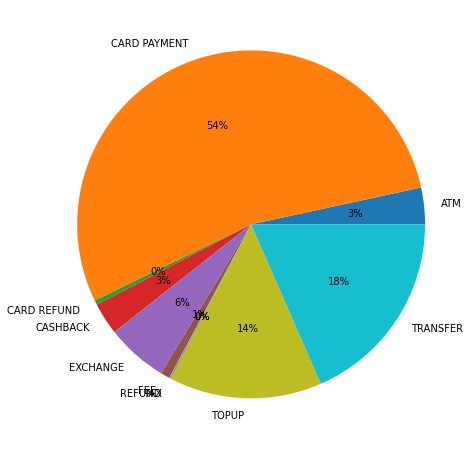

In [0]:
plt.figure(figsize=(8,8))
labels = ['ATM' , 'CARD PAYMENT' , 'CARD REFUND' , 'CASHBACK', 'EXCHANGE' , 'FEE' , 'REFUND' , 'TAX' , 'TOPUP' , 'TRANSFER']
values = [74181,1173661,9209,65063,124800,18786,1193,2267,309740,402126]
plt.pie(values , labels=labels ,  autopct='%1.0f%%')
plt.savefig('fig1.png')
plt.show()

In [0]:
trans['amount_usd'].sum()

259373011012.1501

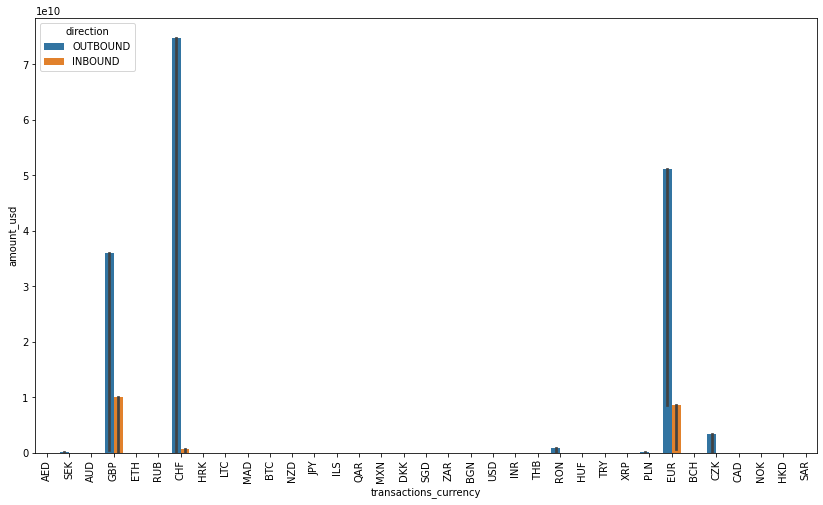

In [0]:
categories = [trans.transactions_currency]
trans['amount_usd'] = trans['amount_usd'].astype(int) #kanw cast ola ta price se akeraious
plt.figure(figsize=(14,8))
ax = plt.subplot(1,1,1)
plt.xticks(rotation = 'vertical') #anti gia vertical mporw na vale moires p.x 45 kai ta gyrnaei ypo gwnia
sns.barplot(x= 'transactions_currency' , y= 'amount_usd' , data = trans , estimator = np.max ,hue = 'direction') #me to estimator ayto briskw oti h mercedes exei genika to akribotero montelo
plt.savefig('fig6.png')
plt.show()

In [0]:
len(trans[trans['direction']=='INBOUND'])
len(trans[trans['direction']=='OUTBOUND'])

1759079

In [0]:
len(trans[trans['direction']=='INBOUND'])


421947

In [0]:
len(trans[trans['direction']=='OUTBOUND'])

1759079

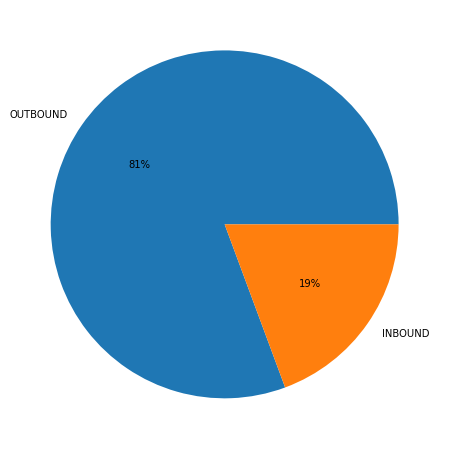

In [0]:
plt.figure(figsize=(8,8))
labels = ['OUTBOUND' , 'INBOUND']
values = [1759079,421947]
plt.pie(values , labels=labels ,  autopct='%1.0f%%')
plt.savefig('fig3.png')
plt.show()

In [0]:
def clean_text(text):
  text = text.replace('_' , ' ') #s.replace({'a': None}) 
  #df.replace(to_replace ="Boston Celtics", 
                 value ="Omega Warrior")
  return text

trans.transactions_type	= trans.transactions_type.apply(clean_text)

IndentationError: ignored

In [0]:
  trans.replace(to_replace ="_", 
                 value =" ")

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date
0,transaction_0,TRANSFER,AED,4,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_4368,2018-04-03 03:34:21.784487
1,transaction_1,CARD_PAYMENT,AED,15,COMPLETED,FALSE,4111.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-19 06:15:59.537032
2,transaction_2,CARD_PAYMENT,AED,43,COMPLETED,FALSE,5814.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-18 18:53:41.323032
3,transaction_3,TRANSFER,AED,10043,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_2355,2019-03-22 14:20:01.513032
4,transaction_4,CARD_PAYMENT,AED,43,COMPLETED,FALSE,5651.0,Abu Dhabi,ARE,OUTBOUND,user_14318,2019-03-22 05:42:50.316652
...,...,...,...,...,...,...,...,...,...,...,...,...
2181021,transaction_1499995,CARD_PAYMENT,GBP,0,REVERTED,TRUE,5815.0,London,GBR,OUTBOUND,user_4545,2019-02-02 08:52:04.252023
2181022,transaction_1499996,CARD_PAYMENT,GBP,0,REVERTED,FALSE,5816.0,London,GBR,OUTBOUND,user_8818,2019-02-01 08:50:43.323799
2181023,transaction_1499997,CARD_PAYMENT,GBP,0,REVERTED,FALSE,4111.0,tfl.gov.uk/cp,GBR,OUTBOUND,user_12430,2019-01-31 15:23:36.248468
2181024,transaction_1499998,CARD_PAYMENT,GBP,0,REVERTED,FALSE,5946.0,www.gopro.com,NLD,OUTBOUND,user_14764,2019-01-31 13:57:35.122585


In [0]:
u,c = np.unique (trans.user_id , return_counts = True )
for z in zip(list(u) , list(c)):
  print ('{} : {}'.format(z[0],z[1]))

In [0]:
u,c = np.unique (trans.transactions_type   , return_counts = True )
for z in zip(list(u) , list(c)):
  print ('{} : {}'.format(z[0],z[1]))

ATM : 74181
CARD_PAYMENT : 1173661
CARD_REFUND : 9209
CASHBACK : 65063
EXCHANGE : 124800
FEE : 18786
REFUND : 1193
TAX : 2267
TOPUP : 309740
TRANSFER : 402126


In [0]:
len(trans[trans['user_id']=='user_2355'])


588

In [0]:
trans3.groupby(['transactions_type']).mean()

,amount_usd
transactions_type,
ATM,73.640630
CARD_PAYMENT,21.453367
CARD_REFUND,65.049085
CASHBACK,0.092411
EXCHANGE,193.405059
FEE,8.118956
REFUND,400.217720
TAX,0.099991
TOPUP,176.800100


In [0]:
trans.groupby(['user_id'])

In [0]:
trans3

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,direction,user_id
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,OUTBOUND,user_4368
1,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,OUTBOUND,user_2355
2,transaction_2,CARD_PAYMENT,AED,43.40,COMPLETED,OUTBOUND,user_2355
3,transaction_3,TRANSFER,AED,10043.01,COMPLETED,OUTBOUND,user_2355
4,transaction_4,CARD_PAYMENT,AED,43.81,COMPLETED,OUTBOUND,user_14318
...,...,...,...,...,...,...,...
2181021,transaction_1499995,CARD_PAYMENT,GBP,0.00,REVERTED,OUTBOUND,user_4545
2181022,transaction_1499996,CARD_PAYMENT,GBP,0.00,REVERTED,OUTBOUND,user_8818
2181023,transaction_1499997,CARD_PAYMENT,GBP,0.00,REVERTED,OUTBOUND,user_12430
2181024,transaction_1499998,CARD_PAYMENT,GBP,0.00,REVERTED,OUTBOUND,user_14764


In [0]:
trans5 = trans3.drop(trans.index[trans['amount_usd']== 0.00  ])
trans5

,transaction_Id,transactions_type,transactions_currency,amount_usd,transactions_state,direction,user_id
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,OUTBOUND,user_4368
1,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,OUTBOUND,user_2355
2,transaction_2,CARD_PAYMENT,AED,43.40,COMPLETED,OUTBOUND,user_2355
3,transaction_3,TRANSFER,AED,10043.01,COMPLETED,OUTBOUND,user_2355
4,transaction_4,CARD_PAYMENT,AED,43.81,COMPLETED,OUTBOUND,user_14318
...,...,...,...,...,...,...,...
2181015,transaction_1499989,CARD_PAYMENT,GBP,4.35,COMPLETED,OUTBOUND,user_8637
2181016,transaction_1499990,TOPUP,GBP,50.00,COMPLETED,INBOUND,user_1552
2181017,transaction_1499991,TRANSFER,GBP,450.00,COMPLETED,OUTBOUND,user_4888
2181018,transaction_1499992,TRANSFER,GBP,5.00,COMPLETED,INBOUND,user_4272


In [0]:
trans6 = trans5.drop(trans5.index[trans['transactions_state']== 'DECLINED' ] )
trans6


IndexError: ignored

In [0]:
trans5.transpose()
print(trans5.drop(0 , axis=0))


              transaction_Id transactions_type  ... direction     user_id
1              transaction_1      CARD_PAYMENT  ...  OUTBOUND   user_2355
2              transaction_2      CARD_PAYMENT  ...  OUTBOUND   user_2355
3              transaction_3          TRANSFER  ...  OUTBOUND   user_2355
4              transaction_4      CARD_PAYMENT  ...  OUTBOUND  user_14318
5              transaction_5      CARD_PAYMENT  ...  OUTBOUND  user_14318
...                      ...               ...  ...       ...         ...
2181015  transaction_1499989      CARD_PAYMENT  ...  OUTBOUND   user_8637
2181016  transaction_1499990             TOPUP  ...   INBOUND   user_1552
2181017  transaction_1499991          TRANSFER  ...  OUTBOUND   user_4888
2181018  transaction_1499992          TRANSFER  ...   INBOUND   user_4272
2181019  transaction_1499993      CARD_PAYMENT  ...  OUTBOUND   user_5484

[1812685 rows x 7 columns]


In [0]:
trans5.shape


(1812686, 7)

In [0]:
trans5.describe()

,amount_usd
count,1.812686e+06
mean,1.430876e+05
std,7.629472e+07
min,1.000000e+00
25%,4.680000e+00
50%,1.135000e+01
75%,3.877000e+01
max,7.464155e+10


In [0]:
u,c = np.unique (trans5.amount_usd , return_counts = True )
for z in zip(list(u) , list(c)):
  print ('{} : {}'.format(z[0],z[1]))

Streaming output truncated to the last 5000 lines.
1209.73 : 1
1209.93 : 1
1210.02 : 1
1210.21 : 1
1210.38 : 2
1210.57 : 1
1210.64 : 1
1211.46 : 1
1211.51 : 1
1211.59 : 1
1211.66 : 1
1211.89 : 1
1211.92 : 2
1212.09 : 1
1212.48 : 1
1212.57 : 1
1212.61 : 1
1212.64 : 1
1212.87 : 2
1212.98 : 1
1213.08 : 1
1213.09 : 1
1213.23 : 1
1213.27 : 2
1213.75 : 1
1214.48 : 12
1214.53 : 1
1214.86 : 1
1215.0 : 2
1215.39 : 1
1215.48 : 1
1215.61 : 1
1216.0 : 1
1216.66 : 1
1216.78 : 1
1217.02 : 2
1217.29 : 1
1217.41 : 2
1218.16 : 1
1218.22 : 1
1218.72 : 1
1219.0 : 1
1219.01 : 1
1219.21 : 1
1219.64 : 1
1219.86 : 1
1220.0 : 3
1220.37 : 2
1220.43 : 1
1220.96 : 1
1221.13 : 1
1221.17 : 1
1221.28 : 3
1221.34 : 1
1221.45 : 1
1221.7 : 1
1221.81 : 1
1222.0 : 1
1222.62 : 1
1223.11 : 1
1223.83 : 1
1223.94 : 1
1224.57 : 1
1224.8 : 1
1224.88 : 1
1224.96 : 1
1225.36 : 1
1225.38 : 1
1225.53 : 4
1225.68 : 1
1225.8 : 1
1226.0 : 1
1226.27 : 2
1226.35 : 2
1226.84 : 1
1228.09 : 1
1228.11 : 1
1228.53 : 1
1229.03 : 1
1229.04 :

In [0]:
trans5['amount_usd'].sum()

259372869336.43005

In [0]:
trans5['amount_usd'].sum()

259372869336.43005

In [0]:
trans5['amount_usd'].min()

1.0

In [0]:
trans3=trans3.rename(columns={"Transaction Id" : "transaction_Id"})

In [0]:
trans3

,transaction_Id,transactions_type,transactions_currency,amount_usd,transactions_state,direction,user_id
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,OUTBOUND,user_4368
1,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,OUTBOUND,user_2355
2,transaction_2,CARD_PAYMENT,AED,43.40,COMPLETED,OUTBOUND,user_2355
3,transaction_3,TRANSFER,AED,10043.01,COMPLETED,OUTBOUND,user_2355
4,transaction_4,CARD_PAYMENT,AED,43.81,COMPLETED,OUTBOUND,user_14318
...,...,...,...,...,...,...,...
2181021,transaction_1499995,CARD_PAYMENT,GBP,0.00,REVERTED,OUTBOUND,user_4545
2181022,transaction_1499996,CARD_PAYMENT,GBP,0.00,REVERTED,OUTBOUND,user_8818
2181023,transaction_1499997,CARD_PAYMENT,GBP,0.00,REVERTED,OUTBOUND,user_12430
2181024,transaction_1499998,CARD_PAYMENT,GBP,0.00,REVERTED,OUTBOUND,user_14764


In [0]:
trans5['amount_usd'].value_counts(ascending = True)

1066.46        1
452.32         1
256.40         1
208.37         1
399.66         1
           ...  
42.55      23181
17.02      25440
1.00       28884
10.00      29336
8.51       36536
Name: amount_usd, Length: 43365, dtype: int64

In [0]:
trans5

,transaction_Id,transactions_type,transactions_currency,amount_usd,transactions_state,direction,user_id
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,OUTBOUND,user_4368
1,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,OUTBOUND,user_2355
2,transaction_2,CARD_PAYMENT,AED,43.40,COMPLETED,OUTBOUND,user_2355
3,transaction_3,TRANSFER,AED,10043.01,COMPLETED,OUTBOUND,user_2355
4,transaction_4,CARD_PAYMENT,AED,43.81,COMPLETED,OUTBOUND,user_14318
...,...,...,...,...,...,...,...
2181021,transaction_1499995,CARD_PAYMENT,GBP,0.00,REVERTED,OUTBOUND,user_4545
2181022,transaction_1499996,CARD_PAYMENT,GBP,0.00,REVERTED,OUTBOUND,user_8818
2181023,transaction_1499997,CARD_PAYMENT,GBP,0.00,REVERTED,OUTBOUND,user_12430
2181024,transaction_1499998,CARD_PAYMENT,GBP,0.00,REVERTED,OUTBOUND,user_14764


In [0]:
trans6 = trans5.drop(trans5.index[trans5['transactions_state'] == 'FAILED'] )
trans6

,transaction_Id,transactions_type,transactions_currency,amount_usd,transactions_state,direction,user_id
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,OUTBOUND,user_4368
1,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,OUTBOUND,user_2355
2,transaction_2,CARD_PAYMENT,AED,43.40,COMPLETED,OUTBOUND,user_2355
3,transaction_3,TRANSFER,AED,10043.01,COMPLETED,OUTBOUND,user_2355
4,transaction_4,CARD_PAYMENT,AED,43.81,COMPLETED,OUTBOUND,user_14318
...,...,...,...,...,...,...,...
2181021,transaction_1499995,CARD_PAYMENT,GBP,0.00,REVERTED,OUTBOUND,user_4545
2181022,transaction_1499996,CARD_PAYMENT,GBP,0.00,REVERTED,OUTBOUND,user_8818
2181023,transaction_1499997,CARD_PAYMENT,GBP,0.00,REVERTED,OUTBOUND,user_12430
2181024,transaction_1499998,CARD_PAYMENT,GBP,0.00,REVERTED,OUTBOUND,user_14764


In [0]:
u,c = np.unique (trans.transactions_state , return_counts = True )
for z in zip(list(u) , list(c)):
  print ('{} : {}'.format(z[0],z[1]))

CANCELLED : 1364
COMPLETED : 1916387
DECLINED : 124226
FAILED : 32566
PENDING : 17153
REVERTED : 89330
